In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Research/Data/

/content/drive/My Drive/Research/Data


In [4]:
df = pd.read_csv('sinhala_df_new.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12573 entries, 0 to 12572
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_id    12567 non-null  object
 1   video_id      12307 non-null  object
 2   video_title   12307 non-null  object
 3   text          12573 non-null  object
 4   timestamp     12556 non-null  object
 5   author        12553 non-null  object
 6   author_email  12556 non-null  object
 7   reply_to      261 non-null    object
 8   Label         5387 non-null   object
 9   Domain        5621 non-null   object
 10  About         3582 non-null   object
dtypes: object(11)
memory usage: 1.1+ MB


In [6]:
df.Domain.value_counts()

,count
Domain,
P,1793
non,1475
Political,973
p,818
Non,506
Politician,28
political,16
Non-Political,7
Government,2


In [7]:
df['Domain'] = df['Domain'].replace(['P', 'p','Political','Politician','political','Government','rajapaksha',' P'], 'political')
df['Domain'] = df['Domain'].replace(['non','Non','Non ','non ','Non-Political',' non'],'non')

In [8]:
df.About.value_counts()

,count
About,
Ranil,552
Prasanna,428
NPP,402
Maithree,234
Other,163
...,...
Rajapakshat,1
sports minister,1
Premadasa,1


# Separate Political Comments

In [9]:
political_df = df[df['Domain'] == 'political']

In [10]:
political_df.shape

(3631, 11)

#Label 2 (Positive/Negative/Neutral)

In [11]:
df.Label.value_counts()

,count
Label,
Negative,2761
negative,1082
Positive,592
Neutral,466
positive,271
neutral,136
postive,14
Positve,11
negative,10


In [12]:
df['Label'] = df['Label'].replace(['Negative', 'negative','Negative ','negative ','negartive','Negativve','negaitve','Negatuve','negarive','ngative','negaive',], 'negative')
df['Label'] = df['Label'].replace(['Positive ', 'positive','postive','Positve','positve','Positive','Positiive','Poaitive'], 'positive')
df['Label'] = df['Label'].replace(['Neutral ', 'neutral','Netural','Neutal','neutal','Neutral'], 'neutral')

In [15]:
political_df.Label.value_counts()

,count
Label,
negative,2808
positive,636
neutral,184


In [16]:
political_df['Label'] = political_df['Label'].replace(['Negative', 'negative','Negative ','negative ','negartive','Negativve','negaitve','Negatuve','negarive','ngative','negaive',], 'negative')
political_df['Label'] = political_df['Label'].replace(['Positive ', 'positive','postive','Positve','positve','Positive','Positiive','Poaitive'], 'positive')
political_df['Label'] = political_df['Label'].replace(['Neutral ', 'neutral','Netural','Neutal','neutal','Neutral'], 'neutral')

<ipython-input-16-de54c33d81bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_df['Label'] = political_df['Label'].replace(['Negative', 'negative','Negative ','negative ','negartive','Negativve','negaitve','Negatuve','negarive','ngative','negaive',], 'negative')
<ipython-input-16-de54c33d81bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_df['Label'] = political_df['Label'].replace(['Positive ', 'positive','postive','Positve','positve','Positive','Positiive','Poaitive'], 'positive')

In [17]:
political_df.shape

(3631, 11)

# Positive/Negative dataframe

In [19]:
positive_df = political_df[political_df['Label'] == 'positive']
negative_df = political_df[political_df['Label'] == 'negative']

# Sample 636 entries from each category
sampled_positive = positive_df.sample(n=636, random_state=88)
sampled_negative = negative_df.sample(n=636, random_state=88)

# Combine the sampled entries into a single DataFrame
df = pd.concat([sampled_positive, sampled_negative])

In [20]:
df.shape

(1272, 11)

# Combine Title and Text columns

In [21]:
df['Combined'] = df['video_title'] + '.' + df['text']

# Remove Emoticons

In [22]:
import re

def remove_emoji(string):
    if isinstance(string, str): # Check if the input is a string
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string)
    else:
        return string # Return the original value if it's not a string

df['Combined'] = df['Combined'].apply(remove_emoji)

# Remove URLs

In [23]:
import re

def remove_urls(text):
    if isinstance(text, str): # Check if the input is a string
        return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    else:
        return text # Return the original value if it's not a string

# Apply the function to the text column
df['Combined'] = df['Combined'].apply(remove_urls)

# Data Cleaning

In [24]:
def clean_data(text):
    if isinstance(text, str): # Check if the input is a string
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text) # Remove URLs

        text = re.sub(r'<.*?>', '', text)     # Remove HTML tags

        text = re.sub(r'@\\w+', '', text)  # Remove mentions

        text = re.sub(r'[^\u0D80-\u0DFF\s]', ' ', text) # Remove non-Sinhala characters (punctuation, numbers, etc.)
        return text
    else:
        return "" # Return an empty string if it's not a string

df['Combined'] = df['Combined'].apply(clean_data)

In [25]:
df.iloc[50:75]

,comment_id,video_id,video_title,text,timestamp,author,author_email,reply_to,Label,Domain,About,Combined
12556,UgztXmXyJQhhagrFVSJ4AaABAg,EgINgMDH_OA,Deepthi Samaga Paththaren Eha Discussion - (2...,ගෝටාභය රාජපක්ෂ මහතා ජනපති ධුරය අතහැරීම එවකට ති...,2024-03-16T17:06:51Z,@h.m.gaminileelarathna7728,UCA-UnRUpT6SwyGshssJ7Avw,NaN,positive,political,Gota,...
5792,UgyMzd4KekqDl_mJgf14AaABAg,2PHN9PDX_s0,ජනාධිපතිවරණය කල් යයිද ? | Hiru Eththa | Hiru N...,දුසිතයින් පන්නා දමා මාලිමාව බලයට ගේමු ❤,2024-02-12T12:14:15Z,@manjuthushara9007,UCHUXizcPBqWCyGNfJtFstkA,NaN,positive,political,NPP,ජනාධිපතිවරණය කල් යයිද ...
10167,UgxdT8I24FmH9ea4KgF4AaABAg,ZEIFB7oe5j4,හිරු සවස 6.55 ප්‍රධාන ප්‍රවෘත්ති ප්‍රකාශය - Hi...,❤❤❤❤මාලිමාවට ජයවේවා❤❤❤,2024-03-02T16:54:36Z,@kapilasuriyabandara6459,UCJ924xpej0T1rwqiAVZJQdw,NaN,positive,political,NPP,හිරු සවස ප් රධාන ප් රවෘත්ති ප් රකාශය ...
5360,Ugxyxaujn7F6ZesQ0kp4AaABAg,2oMeCFVGpWI,ප්‍රසන්න පොහොට්ටුව හැර යයිද ? | Hiru News | Hi...,චිරන්ජයතු මාලිමා 🚩🚩🚩🚩🚩🚩🚩🚩ච්රන්ජයතු මාලිම,2024-03-02T15:39:01Z,@user-xe9dk3ep8y,UCeouoGu9ZCI6a_XP5xi0t-A,NaN,positive,political,NPP,ප් රසන්න පොහොට්ටුව හැර යයිද ...
1594,UgyIF67FvtY6d_ECdfx4AaABAg,XNxcv8kOIAc,Ada Derana Black & White - 2018.12.21,Jaya වේවා ජනාධිපති <br>Goood 🙏,2018-12-21T18:10:40Z,@samanalayasadasamanalaya393,UCBbUpVc94PT5Kl1leU9P0hw,NaN,positive,political,Maithripala,වේව...
5903,Ugy2-N9rEkU0TBXximF4AaABAg,2PHN9PDX_s0,ජනාධිපතිවරණය කල් යයිද ? | Hiru Eththa | Hiru N...,ජාතික ජනබලවෙිගයට ✌ ජයවෙිවා ❤ only Npp.,2024-01-26T16:16:32Z,@peshaladumidu1718,UC28AolSiP94iroJiK_wn-og,NaN,positive,political,NPP,ජනාධිපතිවරණය කල් යයිද ...
5373,UgzoXJePmlVrNqTt59R4AaABAg,2oMeCFVGpWI,ප්‍රසන්න පොහොට්ටුව හැර යයිද ? | Hiru News | Hi...,මාලිමාවට ජයවේවා,2024-03-02T15:31:05Z,@s.a.ruwansampath9218,UCAcCvXEnBJlrLaXb8pZ878A,NaN,positive,political,NPP,ප් රසන්න පොහොට්ටුව හැර යයිද ...
5883,UgyrC3o6Lf6Ost2-5FR4AaABAg,2PHN9PDX_s0,ජනාධිපතිවරණය කල් යයිද ? | Hiru Eththa | Hiru N...,සුපිරි කතාව,2024-01-27T05:26:25Z,@padmakumarasusanthajayanat4395,UC9EL_1LZF3NHxSqaKFO6rTQ,NaN,positive,political,other,ජනාධිපතිවරණය කල් යයිද ...
8742,UgxgfEpOMi608mFZ6Dd4AaABAg,l6ckGxem8fk,හිරු රාත්‍රී 9.55 ප්‍රධාන ප්‍රවෘත්ති විකාශය - ...,අනේ රෝහිනී කවිරත්න මේක හොඳට අහගන්න හැත්තෑ හය අ...,2024-03-31T19:41:51Z,@kapilasuriyabandara6459,UCJ924xpej0T1rwqiAVZJQdw,NaN,positive,political,NPP,හිරු රාත් රී ප් රධාන ප් රවෘත්ති විකාශය ...
5034,Ugw8wYmK11eFi4tcWGN4AaABAg,2oMeCFVGpWI,ප්‍රසන්න පොහොට්ටුව හැර යයිද ? | Hiru News | Hi...,මාලිමාවට ජයවේවා,2024-03-03T04:10:13Z,@dhammika-vz5hd,UCi-g1jxjBJmM0zHHnAowBoA,NaN,positive,political,NPP,ප් රසන්න පොහොට්ටුව හැර යයිද ...


In [26]:
columns = ['Combined','Label','Domain','About']

df = df[columns]

In [27]:
df.iloc[12:20]

,Combined,Label,Domain,About
974,අගමැතිගෙන් විශේෂ ප් රකාශයක් ගරු අගමැතිතුමනි...,positive,political,Ranil
5213,ප් රසන්න පොහොට්ටුව හැර යයිද ...,positive,political,NPP
4327,සජිත් සමග සාකච්ඡාවකින් පසුව ශ් රී ලංකාවට ලැ...,positive,political,sajith
1679,ජනාධිපතිවරණය රත්නපුර දිස්ත් රික්කය තැ...,positive,political,Gota
10145,හිරු සවස ප් රධාන ප් රවෘත්ති විකාශය ...,positive,political,NPP
1703,ජනාධිපතිවරණය පොලොන්නරුව දිස්ත් රික්කය ...,positive,political,Gota
5657,ප් රසන්න පොහොට්ටුව හැර යයිද ...,positive,political,NPP
1450,ණය සහනයට මාවත විවෘත වෙද්දී ...,positive,political,NPP


In [28]:
df.Domain.value_counts()

,count
Domain,
political,1272


In [ ]:
df = df.sample(frac=1.0, random_state=42)

In [29]:
labels = df['Label'].unique().tolist()
labels = [str(s).strip() for s in labels ]
labels
labels[0], labels[1] = labels[1], labels[0]
labels

['negative', 'positive']

In [30]:

NUM_LABELS= len(labels)

id2label={id:label for id,label in enumerate(labels)}

label2id={label:id for id,label in enumerate(labels)}

In [31]:
df.head()

,Combined,Label,Domain,About
11644,ගෝඨාභය ආරක්ෂක ලේකම් නෙමෙයි බිමල් තොපි වගේ පි...,positive,political,Gotabaya
11498,පාර්ලිමේන්තු කැන්ටිමේ කිරි නෑ කිරි ඉල්ලා මන...,positive,political,everyone
8277,ය ගත්ත වැරදි දේශපාලන තීන්දු මැතිවරණය කල්...,positive,political,NPP
1011,අගමැතිගෙන් විශේෂ ප් රකාශයක් ඇත්තටම මේක මහා ...,positive,political,Ranil
6032,රාජ් ය අමාත් ය සනත් නිශාන්ත අවසන් වරට සහභාගී ව...,positive,political,Sanath Nishantha


In [32]:
label2id

{'negative': 0, 'positive': 1}

In [33]:
df.Label.value_counts()

,count
Label,
positive,636
negative,636


In [34]:
id2label

{0: 'negative', 1: 'positive'}

In [35]:
for key, value in enumerate(labels):
    print(value)

negative
positive


In [36]:
df["Label"]=df.Label.map(lambda x: label2id[x.strip()])

In [37]:
df.head()

,Combined,Label,Domain,About
11644,ගෝඨාභය ආරක්ෂක ලේකම් නෙමෙයි බිමල් තොපි වගේ පි...,1,political,Gotabaya
11498,පාර්ලිමේන්තු කැන්ටිමේ කිරි නෑ කිරි ඉල්ලා මන...,1,political,everyone
8277,ය ගත්ත වැරදි දේශපාලන තීන්දු මැතිවරණය කල්...,1,political,NPP
1011,අගමැතිගෙන් විශේෂ ප් රකාශයක් ඇත්තටම මේක මහා ...,1,political,Ranil
6032,රාජ් ය අමාත් ය සනත් නිශාන්ත අවසන් වරට සහභාගී ව...,1,political,Sanath Nishantha


In [38]:

data_texts = df['Combined'].to_list()

data_labels = df['Label'].to_list()

In [39]:
label_set = set(data_labels)

In [40]:
label_set

{0, 1}

In [41]:
df.head()

,Combined,Label,Domain,About
11644,ගෝඨාභය ආරක්ෂක ලේකම් නෙමෙයි බිමල් තොපි වගේ පි...,1,political,Gotabaya
11498,පාර්ලිමේන්තු කැන්ටිමේ කිරි නෑ කිරි ඉල්ලා මන...,1,political,everyone
8277,ය ගත්ත වැරදි දේශපාලන තීන්දු මැතිවරණය කල්...,1,political,NPP
1011,අගමැතිගෙන් විශේෂ ප් රකාශයක් ඇත්තටම මේක මහා ...,1,political,Ranil
6032,රාජ් ය අමාත් ය සනත් නිශාන්ත අවසන් වරට සහභාගී ව...,1,political,Sanath Nishantha


In [42]:
import numpy as np
contents = [content for content in df.Combined]

max_content_len = 0

content_len = []
for content in contents:
    content_len.append(len(content.split()))
    max_content_len = max(len(content.split()), max_content_len)

print('Number of contents:', len(contents))
print('Max length of the contents:', max_content_len)
print('Mean length of the contents:', np.mean(content_len))

Number of contents: 1272
Max length of the contents: 512
Mean length of the contents: 22.52201257861635


# Model and Training

In [43]:
# from transformers import AutoModelForSequenceClassification
# model = AutoModelForSequenceClassification.from_pretrained('AshenR/AshenBERTo', num_labels=NUM_LABELS)  #  binary classi

In [44]:
from transformers import AutoModelForSequenceClassification, RobertaConfig

# Load the existing configuration
config = RobertaConfig.from_pretrained('AshenR/AshenBERTo')

# Modify the dropout rates
config.attention_probs_dropout_prob = 0.1  # Example: Set attention dropout to 30%
config.hidden_dropout_prob = 0.1  # Example: Set hidden layer dropout to 30%

# Set the number of labels in the config
config.num_labels = NUM_LABELS  # Set the number of labels here

# Load the model with the modified configuration
model = AutoModelForSequenceClassification.from_pretrained('AshenR/AshenBERTo', config=config)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:202: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


model.safetensors:   0%|          | 0.00/236M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at AshenR/AshenBERTo and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
model.config

RobertaConfig {
  "_name_or_path": "AshenR/AshenBERTo",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.44.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 20000
}

# Train, Test, Validation Split

In [46]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=88)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=88)

In [47]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
tokenizer = AutoTokenizer.from_pretrained("AshenR/AshenBERTo",force_download = True)

# train_encodings = tokenizer(train_texts,max_length = 512, truncation = True, padding = "max_length"  )

# val_encodings = tokenizer(val_texts, max_length = 512,truncation = True, padding = "max_length" )

# test_encodings = tokenizer(test_texts, max_length = 512,truncation = True, padding = "max_length" )


tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/437k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/307k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

In [48]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset

In [50]:
class FakeNewsDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=350):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.iloc[idx]['Combined']
        label = torch.tensor(self.data.iloc[idx]['Label'], dtype=torch.long)

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'label': label}


# model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Create datasets and data loaders
train_dataset = FakeNewsDataset(train_df, tokenizer)
val_dataset = FakeNewsDataset(val_df, tokenizer)
test_dataset = FakeNewsDataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Set up optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=5e-6)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
NUM_EPOCHS = 20
train_losses = []
val_losses = []
val_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(NUM_EPOCHS):
    # Training
    model.train()
    train_loss = 0.0
    all_preds = []
    all_labels = []

    loop = tqdm(train_loader)
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.logits, 1)

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

        train_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(loss=train_loss / len(loop), acc=accuracy_score(all_preds, all_labels))

    # Validation
    model.eval()
    val_loss = 0.0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            _, preds = torch.max(outputs.logits, 1)

            val_preds.extend(preds.cpu().tolist())
            val_labels.extend(labels.cpu().tolist())

            val_loss += loss.item()

# training
    model.eval()
    test_loss = 0.0
    all_test_preds = []
    all_test_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            _, test_preds = torch.max(outputs.logits, 1)

            all_test_preds.extend(test_preds.tolist())
            all_test_labels.extend(labels.tolist())

            test_loss += loss.item()

    test_accuracy = accuracy_score(all_test_labels, all_test_preds)
    test_accuracies.append(test_accuracy)

    train_acc = accuracy_score(all_preds, all_labels)
    val_acc = accuracy_score(val_preds, val_labels)

    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc)
    train_accuracies.append(train_acc)

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] - Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


Epoch [1/20] - Training Accuracy: 0.7581, Validation Accuracy: 0.7559


100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Epoch [2/20] - Training Accuracy: 0.8053, Validation Accuracy: 0.7874


100%|██████████| 4/4 [00:03<00:00,  1.30it/s]


Epoch [3/20] - Training Accuracy: 0.8289, Validation Accuracy: 0.7638


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


Epoch [4/20] - Training Accuracy: 0.8378, Validation Accuracy: 0.8189


100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


Epoch [5/20] - Training Accuracy: 0.8663, Validation Accuracy: 0.8110


100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Epoch [6/20] - Training Accuracy: 0.8810, Validation Accuracy: 0.8031


100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


Epoch [7/20] - Training Accuracy: 0.8968, Validation Accuracy: 0.8189


100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


Epoch [8/20] - Training Accuracy: 0.9046, Validation Accuracy: 0.8346


100%|██████████| 4/4 [00:02<00:00,  1.35it/s]


Epoch [9/20] - Training Accuracy: 0.9135, Validation Accuracy: 0.8189


100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


Epoch [10/20] - Training Accuracy: 0.9263, Validation Accuracy: 0.8031


100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


Epoch [11/20] - Training Accuracy: 0.9449, Validation Accuracy: 0.8189


100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


Epoch [12/20] - Training Accuracy: 0.9558, Validation Accuracy: 0.8110


100%|██████████| 4/4 [00:03<00:00,  1.12it/s]


Epoch [13/20] - Training Accuracy: 0.9567, Validation Accuracy: 0.8189


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Epoch [14/20] - Training Accuracy: 0.9666, Validation Accuracy: 0.8189


100%|██████████| 4/4 [00:03<00:00,  1.04it/s]


Epoch [15/20] - Training Accuracy: 0.9764, Validation Accuracy: 0.8110


100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


Epoch [16/20] - Training Accuracy: 0.9823, Validation Accuracy: 0.8110


100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Epoch [17/20] - Training Accuracy: 0.9892, Validation Accuracy: 0.8346


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Epoch [18/20] - Training Accuracy: 0.9892, Validation Accuracy: 0.7953


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Epoch [19/20] - Training Accuracy: 0.9921, Validation Accuracy: 0.8031


100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Epoch [20/20] - Training Accuracy: 0.9912, Validation Accuracy: 0.8189


In [56]:
torch.save(model,'model_2.pth')

# Training Accuracy and Validation Accuracy

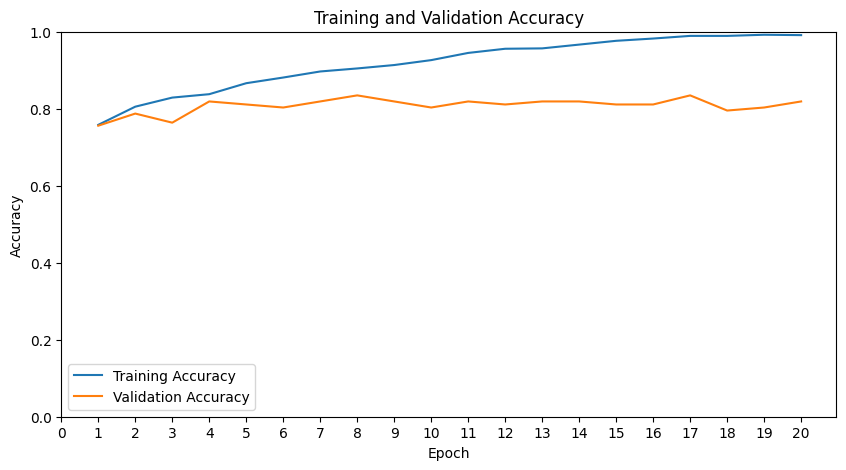

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, NUM_EPOCHS + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, NUM_EPOCHS + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(range(NUM_EPOCHS + 1))
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Training and Validation Loss

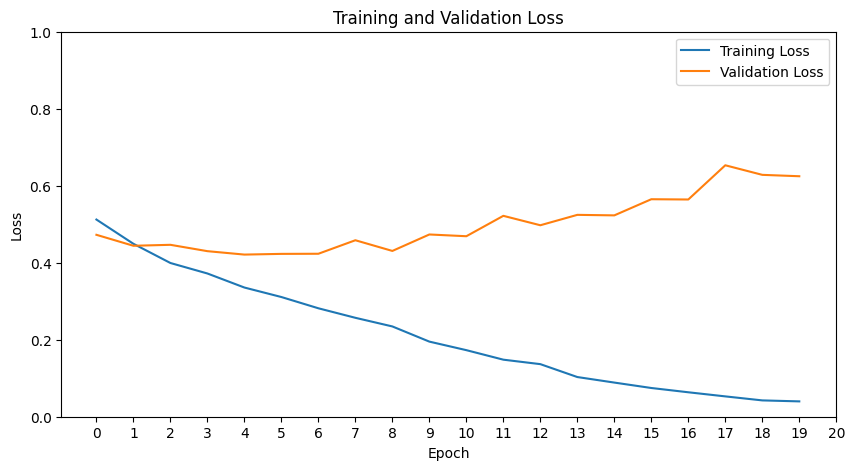

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(NUM_EPOCHS + 1))
plt.title('Training and Validation Loss')
plt.ylim(0,1)
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import classification_report
class_report = classification_report(all_test_labels, all_test_preds)
class_report = classification_report(all_test_labels, all_test_preds,target_names = ['Political','Non Political'])
print(class_report)

               precision    recall  f1-score   support

    Political       0.83      0.88      0.85        59
Non Political       0.89      0.84      0.87        69

     accuracy                           0.86       128
    macro avg       0.86      0.86      0.86       128
 weighted avg       0.86      0.86      0.86       128



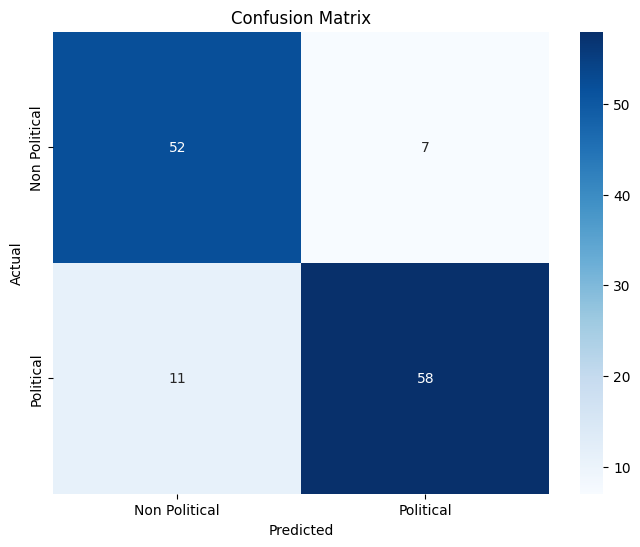

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(all_test_labels, all_test_preds)

plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Political','Political'], yticklabels=['Non Political','Political'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test Accuracy

In [57]:
model_checkpoint = "model_2.pth"
model = torch.load(model_checkpoint)
model = model.to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

test_train_accuracies = []

def calculate_accuracy(data_loader, test_model):
    test_model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = test_model(input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, 1)
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

test_accuracy = calculate_accuracy(test_loader, model)
print(f"Test Accuracy: {test_accuracy:.4f}")


<ipython-input-57-39b047735e5a>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_checkpoint)


Test Accuracy: 0.8594


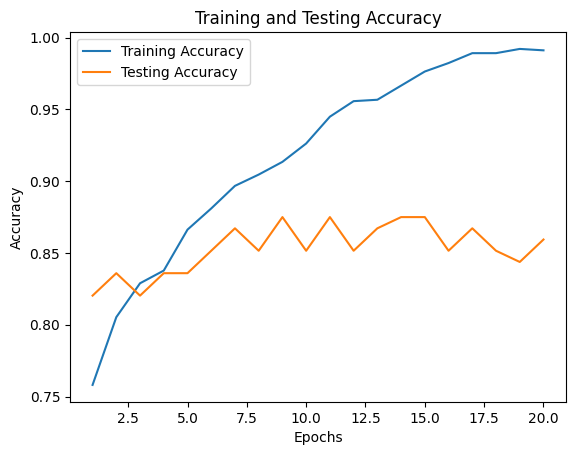

In [58]:
epochs = range(1, NUM_EPOCHS + 1)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, test_accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()